In [1]:
! pip install pycountry_convert
! pip install datascience

In [2]:
import pandas as pd 
import pycountry_convert as pycountry
import datascience as ds
in_data= pd.read_csv("C:\\Users\\aishw\\OneDrive\\Desktop\\Assignment 2\\indicator hiv estimated prevalence^1 15-49 (3).csv", encoding = "ISO-8859-1")
continents_dictionary = {"AS":"Asia", "EU": "Europe", "AF": "Africa", "OC": "Australia", "NA": "North America", "SA": "South America"}
continents=[]
for country in in_data['Estimated HIV Prevalence% - (Ages 15-49)']:
    try:
        continent = continents_dictionary[pycountry.country_alpha2_to_continent_code(pycountry.country_name_to_country_alpha2(country, cn_name_format="default"))]
        continents.append(continent)
    except:
        continents.append('unknown')
in_data['Continent'] = continents
in_data.to_csv("C:\\Users\\aishw\\OneDrive\\Desktop\\Assignment 2\\resultfile1.csv")

In [ ]:
Second

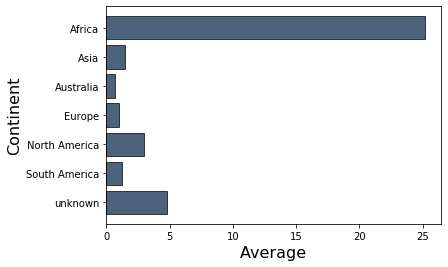

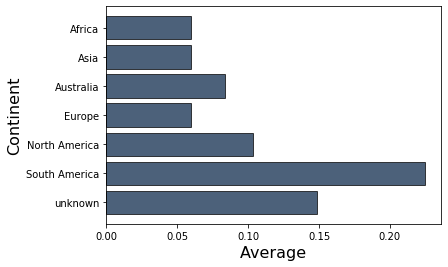

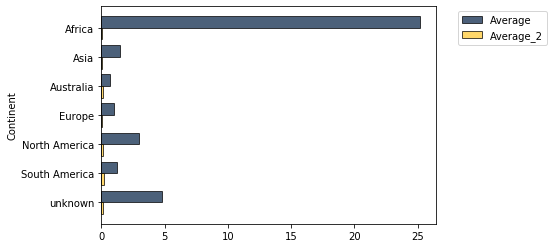

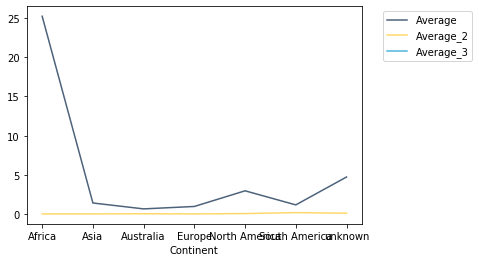

In [3]:
import numpy as np
%matplotlib inline
datatable = ds.Table.from_df(in_data,keep_index=False)
grpcontinent = datatable.select(['Estimated HIV Prevalence% - (Ages 15-49)', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', 'Continent']).groups(['Continent', 'Estimated HIV Prevalence% - (Ages 15-49)'], sum)
grpcontinent = grpcontinent.with_columns(
    'Average', (grpcontinent.column('2000 sum')+grpcontinent.column('2001 sum')+grpcontinent.column('2002 sum')+grpcontinent.column('2003 sum')+grpcontinent.column('2004 sum')+grpcontinent.column('2005 sum')+grpcontinent.column('2006 sum')+grpcontinent.column('2007 sum')+grpcontinent.column('2008 sum')+grpcontinent.column('2009 sum')+grpcontinent.column('2010 sum')+grpcontinent.column('2011 sum'))/12
)
pandas_data = grpcontinent.to_df()
high = pandas_data.loc[pandas_data.reset_index().groupby(['Continent'])['Average'].idxmax()][['Continent', 'Estimated HIV Prevalence% - (Ages 15-49)', 'Average']]
low = pandas_data.loc[pandas_data.reset_index().groupby(['Continent'])['Average'].idxmin()][['Continent', 'Estimated HIV Prevalence% - (Ages 15-49)', 'Average']]
high_table = ds.Table.from_df(high,keep_index=False)
low_table = ds.Table.from_df(low,keep_index=False)
high_table.barh('Continent', 'Average')
low_table.barh('Continent', 'Average')
joined = high_table.join('Continent', low_table).drop(['Estimated HIV Prevalence% - (Ages 15-49)', 'Estimated HIV Prevalence% - (Ages 15-49)_2'])
joined.barh('Continent')
columns = pandas_data[['Continent', 'Estimated HIV Prevalence% - (Ages 15-49)', 'Average']]
ahighest = pd.concat([columns,high]).drop_duplicates(keep=False)
alowest = pd.concat([ahighest,low]).drop_duplicates(keep=False)
select_random_function = lambda obj: obj.loc[np.random.choice(obj.index, 1, True),:]
random_group = alowest.groupby('Continent', as_index=False).apply(select_random_function)
random_group_table = ds.Table.from_df(random_group,keep_index=False)
random_joined = joined.join('Continent', random_group_table).drop(['Estimated HIV Prevalence% - (Ages 15-49)'])
random_joined.plot('Continent')

In [ ]:
Third

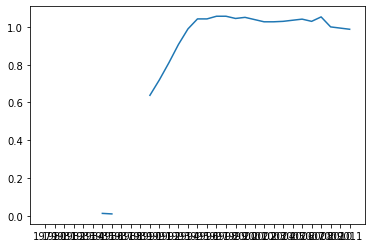

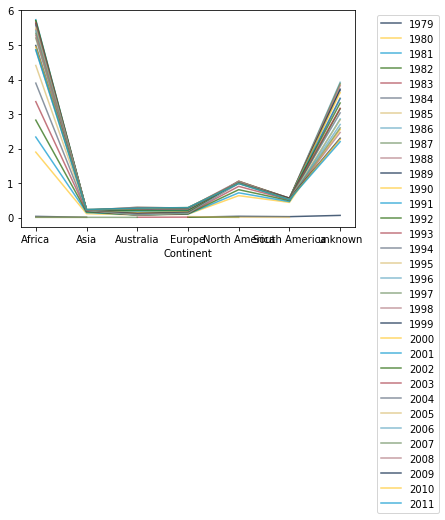

In [5]:
import matplotlib.pyplot as mat
gmean = in_data.groupby('Continent', as_index=False).mean()
econtinent = gmean['Continent'] == 'North America'
mat.plot(gmean.columns[1:], gmean[econtinent].values.tolist()[0][1:])
# Draw graphs for remaining continents

gmean_table = ds.Table.from_df(gmean,keep_index=False) 

gmean_table.plot('Continent')

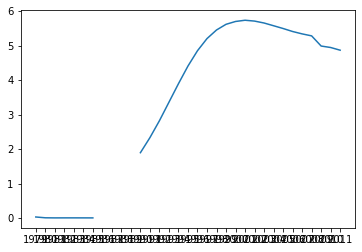

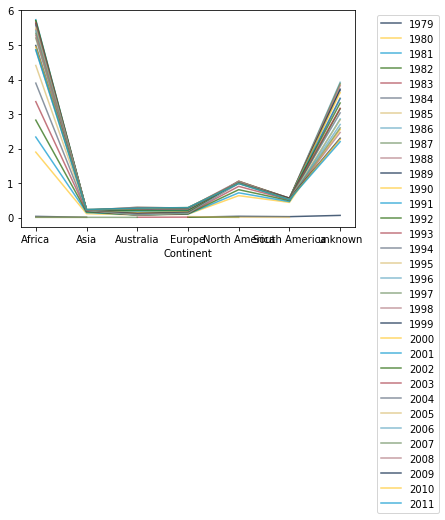

In [6]:
import matplotlib.pyplot as mat
gmean = in_data.groupby('Continent', as_index=False).mean()
econtinent = gmean['Continent'] == 'Africa'
mat.plot(gmean.columns[1:], gmean[econtinent].values.tolist()[0][1:])
# Draw graphs for remaining continents

gmean_table = ds.Table.from_df(gmean,keep_index=False) 

gmean_table.plot('Continent')

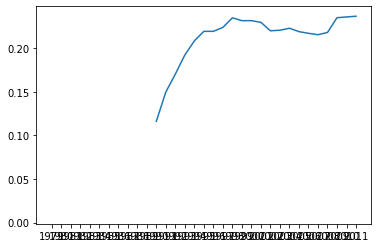

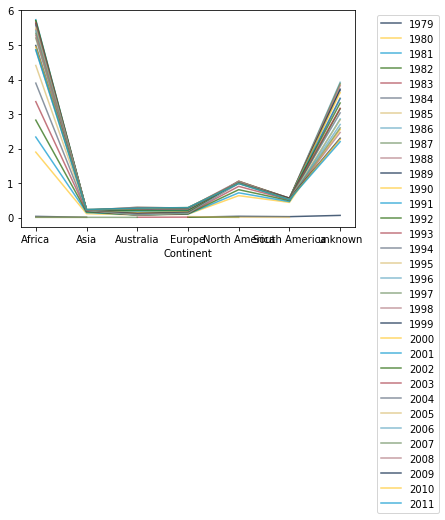

In [4]:
import matplotlib.pyplot as mat
gmean = in_data.groupby('Continent', as_index=False).mean()
econtinent = gmean['Continent'] == 'Asia'
mat.plot(gmean.columns[1:], gmean[econtinent].values.tolist()[0][1:])
# Draw graphs for remaining continents

gmean_table = ds.Table.from_df(gmean,keep_index=False) 

gmean_table.plot('Continent')

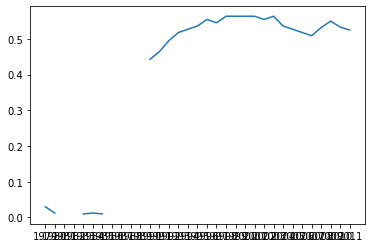

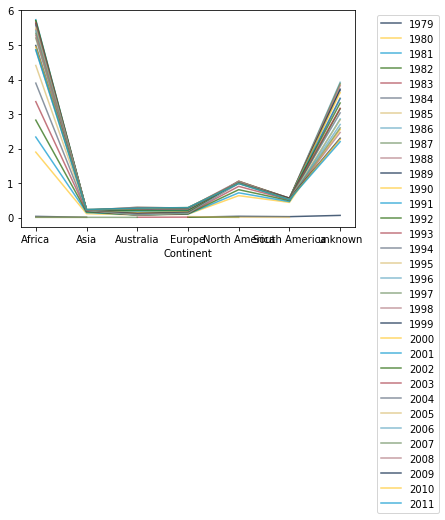

In [7]:
import matplotlib.pyplot as mat
gmean = in_data.groupby('Continent', as_index=False).mean()
econtinent = gmean['Continent'] == 'South America'
mat.plot(gmean.columns[1:], gmean[econtinent].values.tolist()[0][1:])
# Draw graphs for remaining continents

gmean_table = ds.Table.from_df(gmean,keep_index=False) 

gmean_table.plot('Continent')

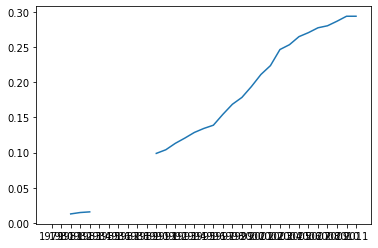

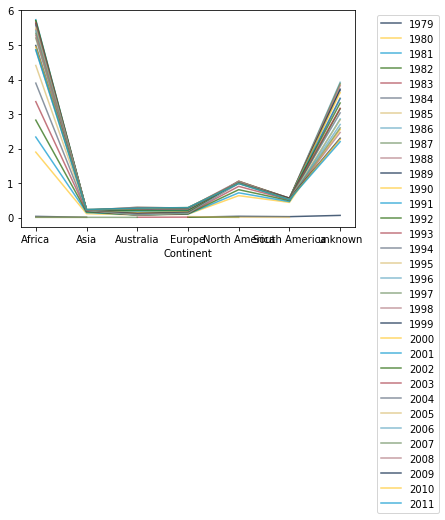

In [8]:
import matplotlib.pyplot as mat
gmean = in_data.groupby('Continent', as_index=False).mean()
econtinent = gmean['Continent'] == 'Europe'
mat.plot(gmean.columns[1:], gmean[econtinent].values.tolist()[0][1:])
# Draw graphs for remaining continents

gmean_table = ds.Table.from_df(gmean,keep_index=False) 

gmean_table.plot('Continent')

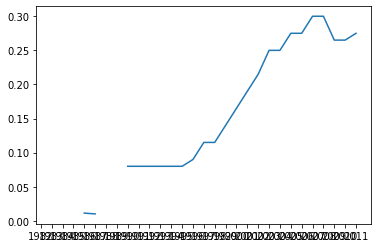

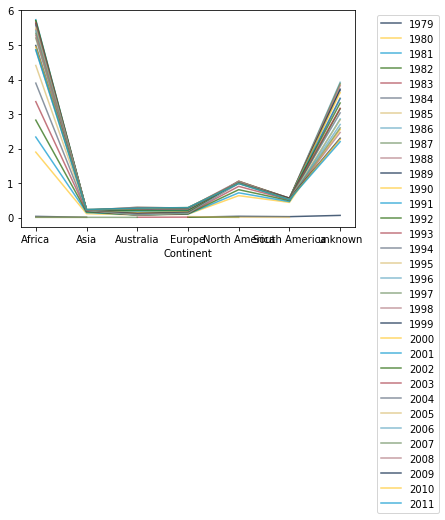

In [9]:
import matplotlib.pyplot as mat
gmean = in_data.groupby('Continent', as_index=False).mean()
econtinent = gmean['Continent'] == 'Australia'
mat.plot(gmean.columns[1:], gmean[econtinent].values.tolist()[0][1:])
# Draw graphs for remaining continents

gmean_table = ds.Table.from_df(gmean,keep_index=False) 

gmean_table.plot('Continent')

In [ ]:
Fourth

    Continent Estimated HIV Prevalence% - (Ages 15-49)      1979  1980  1981  \
0      Africa                                  Algeria       NaN   NaN   NaN   
1      Africa                                   Angola  0.026528   NaN   NaN   
2      Africa                                    Benin       NaN   NaN   NaN   
3      Africa                                 Botswana  0.105976   NaN   NaN   
4      Africa                             Burkina Faso  0.010000   NaN   NaN   
..        ...                                      ...       ...   ...   ...   
270   unknown                       West Bank and Gaza       NaN   NaN   NaN   
271   unknown                             West Germany       NaN   NaN   NaN   
272   unknown                           Western Sahara       NaN   NaN   NaN   
273   unknown                               Yugoslavia       NaN   NaN   NaN   
274   unknown                                    Åland       NaN   NaN   NaN   

     1982  1983      1984  1985  1986  

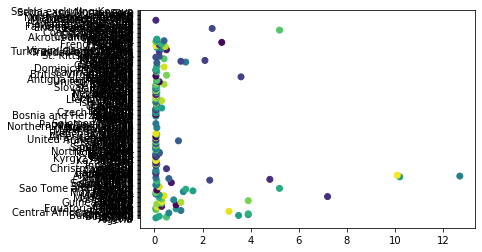

In [10]:
gcountry = in_data.groupby(['Continent', 'Estimated HIV Prevalence% - (Ages 15-49)'], as_index=False).mean()
print(gcountry)
rngrp = np.random.RandomState(0)
colors = rngrp.rand(275)
mat.scatter(gcountry['1990'], 'Estimated HIV Prevalence% - (Ages 15-49)', data = gcountry, c = colors)

    Continent Estimated HIV Prevalence% - (Ages 15-49)      1979  1980  1981  \
0      Africa                                  Algeria       NaN   NaN   NaN   
1      Africa                                   Angola  0.026528   NaN   NaN   
2      Africa                                    Benin       NaN   NaN   NaN   
3      Africa                                 Botswana  0.105976   NaN   NaN   
4      Africa                             Burkina Faso  0.010000   NaN   NaN   
..        ...                                      ...       ...   ...   ...   
270   unknown                       West Bank and Gaza       NaN   NaN   NaN   
271   unknown                             West Germany       NaN   NaN   NaN   
272   unknown                           Western Sahara       NaN   NaN   NaN   
273   unknown                               Yugoslavia       NaN   NaN   NaN   
274   unknown                                    Åland       NaN   NaN   NaN   

     1982  1983      1984  1985  1986  

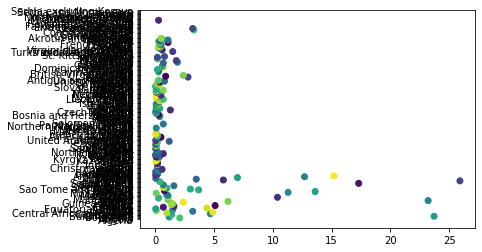

In [11]:
gcountry = in_data.groupby(['Continent', 'Estimated HIV Prevalence% - (Ages 15-49)'], as_index=False).mean()
print(gcountry)
rngrp = np.random.RandomState(0)
colors = rngrp.rand(275)
mat.scatter(gcountry['2010'], 'Estimated HIV Prevalence% - (Ages 15-49)', data = gcountry, c = colors)